# 인공지능(머신러닝)
## 지도학습: 문제, 정답을 알려주고 패턴 찾는 것
* 분류분석, 회귀분석
## 비지도학습: 문제만 알려주고 알고리즘이 알아서 패턴을 찾는 것
* 군집분석 

# 분류 분석의 대표적인 알고리즘 Tree 기반 모델
# 의사결정나무(Decision Tree)
* Decision Tree는 데이터를 분할해서 조건문처럼 분기해 나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속 질문을 던져서 분리
### 장점
* 직관적이고 해석 쉬움
* feature scaling(변수)이 필요 없음(MinMax, StandardScaler 사용을 하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석 할 수 있음
* 시각화가 쉽고 직관적
### 단점
* 과적합(overfitting)이 잘 일어남
* 최적 트리를 찾기 어렵고 시간이 오래 걸릴 수 있음



0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
2. 데이터 전처리(결측값처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로, 문자 -> 숫자, 상관관계)
4. Fearture Engineering(변수 선택, 새로운 특성 생성
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. 카테고리 변수의 더미 변수화(one-hot encoding)
8. sklearn에서 DecisionTreeClassifier를 불러와서 모델 훈련
9. test 세트를 모델에 넣어서 예측값 생성(pred)
10. accuracy_score(), classificatio_report()를 이용해서 모델의 성능 확인

In [6]:
# !pip install koreanize-matplotlib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [8]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [10]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 결측값 처리

In [11]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [13]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     891 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [15]:
data = data.drop(['PassengerId', 'Cabin'], axis=1)
data.head(2)
                  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# EDA

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='str')

In [17]:
cate_cols = data[['Survived', 'Pclass', 'Name', 'Sex','SibSp', 'Parch', 'Ticket', 'Embarked']]
num_cols = data[['Age', 'Fare']]

============================== Survived ==============================
Survived
0    549
1    342
Name: count, dtype: int64


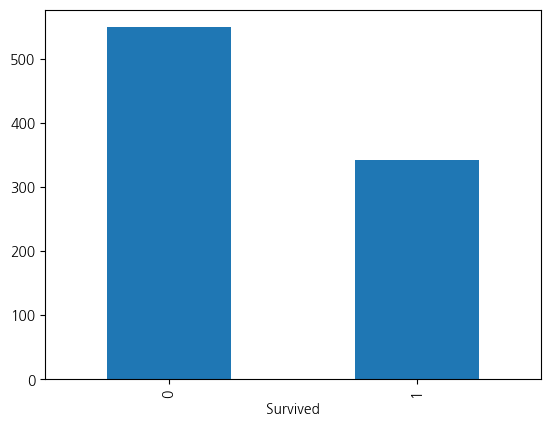


============================== Pclass ==============================
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


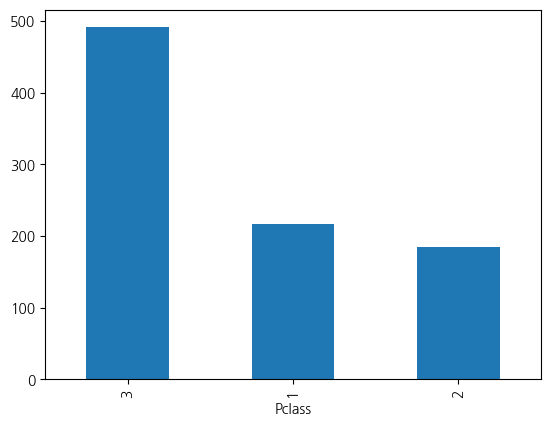


============================== Name ==============================
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64


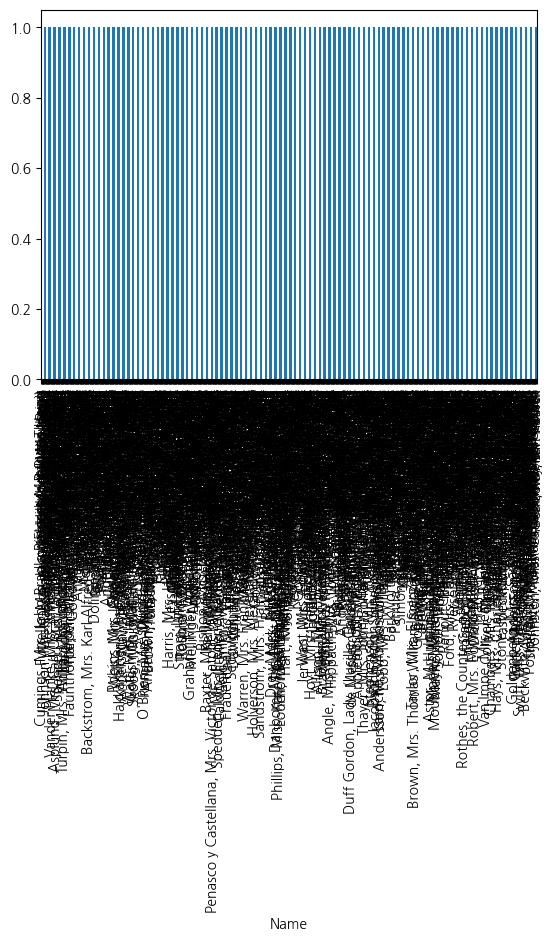


============================== Sex ==============================
Sex
male      577
female    314
Name: count, dtype: int64


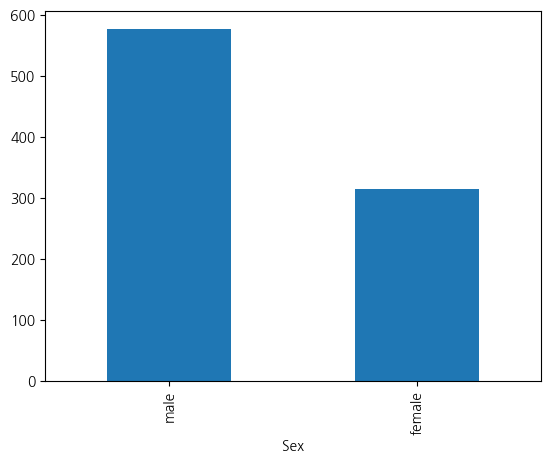


============================== SibSp ==============================
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


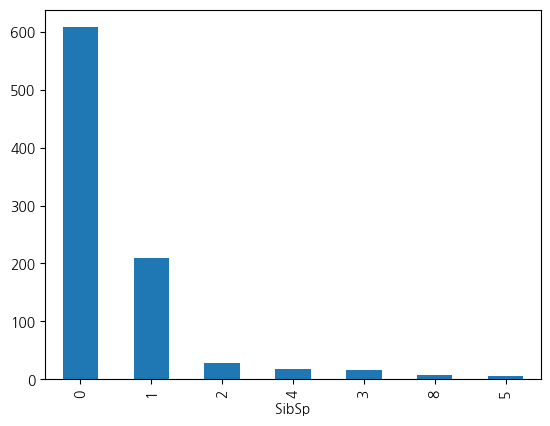


============================== Parch ==============================
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


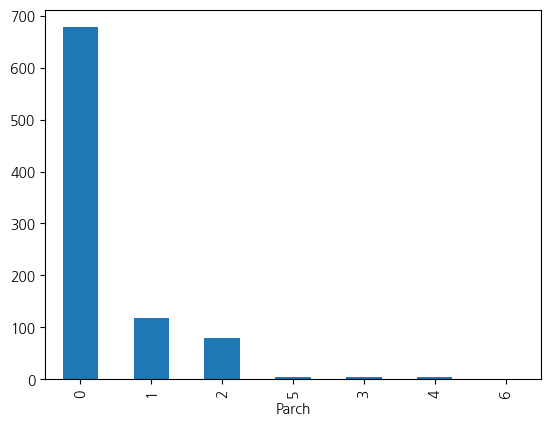


============================== Ticket ==============================
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
370376             1
Name: count, Length: 681, dtype: int64


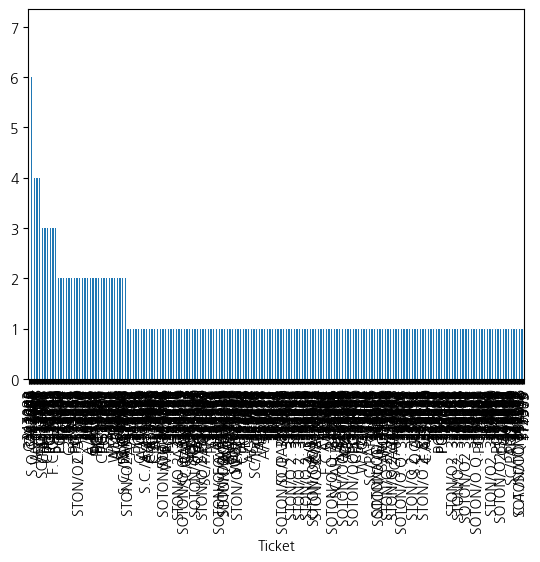


============================== Embarked ==============================
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


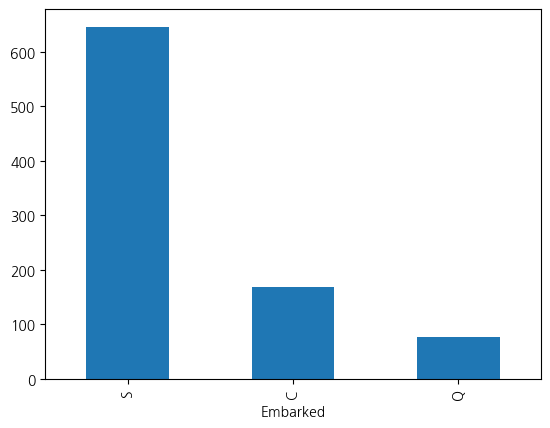

In [18]:
for col in cate_cols.columns:
    print("=" * 30, col, "=" * 30)
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()
    print()

============================== Age ==============================


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

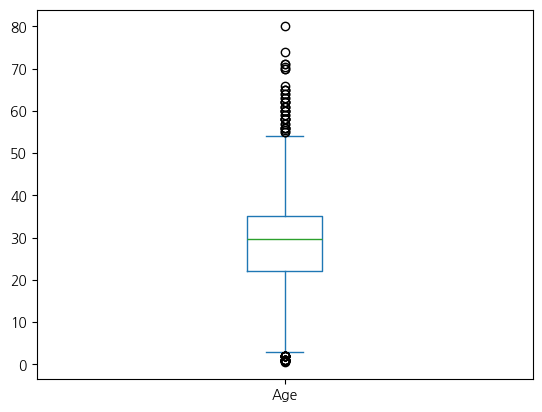

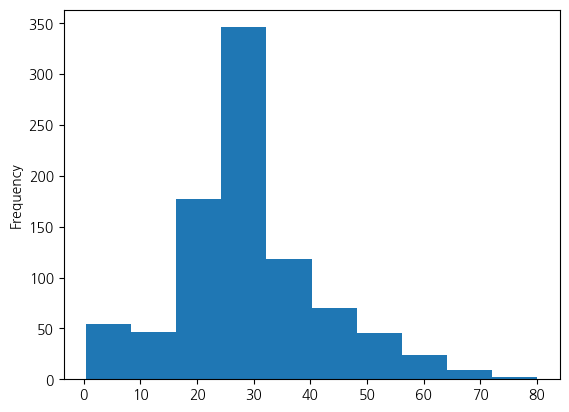

============================== Fare ==============================


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

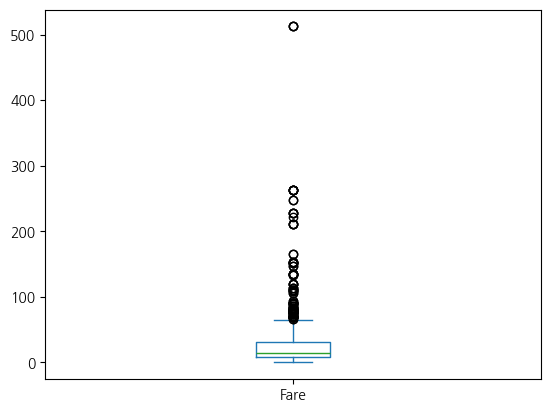

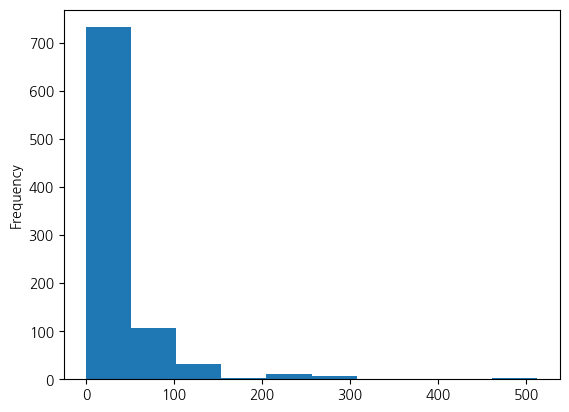

In [19]:
for col in num_cols.columns:
    print("=" * 30, col, "=" * 30)
    display(num_cols[col].describe())
    num_cols[col].plot(kind='box')
    plt.show()
    num_cols[col].plot(kind='hist')
    plt.show()

# groupby로 종속변수와 독립변수와의 관계 찾기

In [20]:
data[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
for col in data.columns[1:]:
    print("=" * 30, col, "=" * 30)
    display(data[['Survived', col]].groupby(col).mean())
    print()

============================== Pclass ==============================


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363



============================== Name ==============================


,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0



============================== Sex ==============================


,Survived
Sex,
female,0.742038
male,0.188908



============================== Age ==============================


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0



============================== SibSp ==============================


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000



============================== Parch ==============================


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000



============================== Ticket ==============================


,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000



============================== Fare ==============================


,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000



============================== Embarked ==============================


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


# sibsp + parch = family
# ticket, name 삭제

In [22]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [23]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


# 문자로 되어 있는 컬럼 숫자로 변환하기

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0


In [26]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
Fare        248
Embarked      3
family        9
dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
ohe_df = ohe.fit_transform(data[['Embarked']])
ohe_df = pd.DataFrame(ohe_df, index=data.index, columns=ohe.get_feature_names_out())
ohe_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [30]:
data = pd.concat([data, ohe_df], axis=1)

In [31]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,S,1,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,C,1,1.0,0.0,0.0
2,1,3,0,26.0,7.9250,S,0,0.0,0.0,1.0
3,1,1,0,35.0,53.1000,S,1,0.0,0.0,1.0
4,0,3,1,35.0,8.0500,S,0,0.0,0.0,1.0


In [32]:
data = data.drop('Embarked', axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Fare,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,1,1.0,0.0,0.0


# 각 변수간 상관관계 보기

In [33]:
data.corr(method="spearman")

,Survived,Pclass,Sex,Age,Fare,family,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.339668,-0.543351,-0.039109,0.323736,0.165463,0.168240,0.003650,-0.149683
Pclass,-0.339668,1.000000,0.135775,-0.308875,-0.688032,-0.075698,-0.220995,0.229763,0.049011
Sex,-0.543351,0.135775,1.000000,0.067809,-0.259593,-0.292035,-0.082853,-0.074115,0.119224
Age,-0.039109,-0.308875,0.067809,1.000000,0.118847,-0.186465,0.024368,0.002690,-0.023040
Fare,0.323736,-0.688032,-0.259593,0.118847,1.000000,0.528907,0.204104,-0.232149,-0.032712
family,0.165463,-0.075698,-0.292035,-0.186465,0.528907,1.000000,0.051652,-0.082497,0.006667
Embarked_C,0.168240,-0.220995,-0.082853,0.024368,0.204104,0.051652,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.229763,-0.074115,0.002690,-0.232149,-0.082497,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.049011,0.119224,-0.023040,-0.032712,0.006667,-0.782742,-0.499421,1.000000


<Axes: >

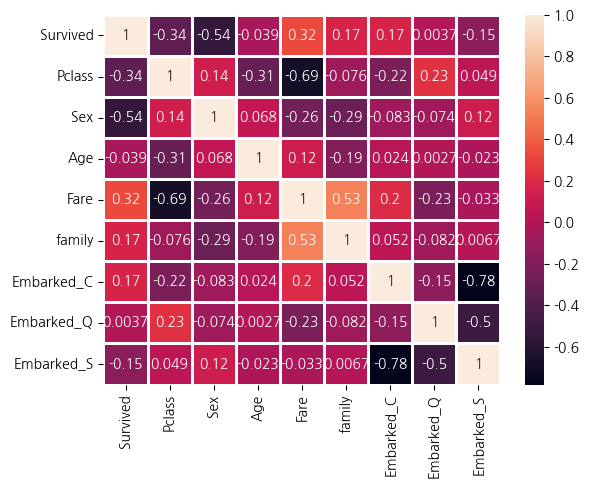

In [34]:
sns.heatmap(data.corr(method="spearman"), annot=True, linewidths=1)

In [35]:
data = data.drop('Fare', axis=1)
data.head()

,Survived,Pclass,Sex,Age,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0.0,0.0,1.0
1,1,1,0,38.0,1,1.0,0.0,0.0
2,1,3,0,26.0,0,0.0,0.0,1.0
3,1,1,0,35.0,1,0.0,0.0,1.0
4,0,3,1,35.0,0,0.0,0.0,1.0


# 나이 컬럼 구간화

In [36]:
data['Age'] = pd.cut(data['Age'],
       bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       right= False,
       labels= ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80'])

In [37]:
data.head(2)

,Survived,Pclass,Sex,Age,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,20s,1,0.0,0.0,1.0
1,1,1,0,30s,1,1.0,0.0,0.0


In [38]:
data = pd.get_dummies(data, columns=['Age'])
data.head()

,Survived,Pclass,Sex,family,Embarked_C,Embarked_Q,Embarked_S,Age_under10s,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80
0,0,3,1,1,0.0,0.0,1.0,False,False,True,False,False,False,False,False,False
1,1,1,0,1,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False
2,1,3,0,0,0.0,0.0,1.0,False,False,True,False,False,False,False,False,False
3,1,1,0,1,0.0,0.0,1.0,False,False,False,True,False,False,False,False,False
4,0,3,1,0,0.0,0.0,1.0,False,False,False,True,False,False,False,False,False


# 종속변수 독립변수 분리

In [39]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# 훈련/테스트데이터 분리 홀드아웃

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 의사결정나무 불러와서 분석하기

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       165
           1       0.79      0.73      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [45]:
for i in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("=" * 30, i, "=" * 30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

============================== 1 ==============================
0.7761194029850746
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268


============================== 2 ==============================
0.7798507462686567
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       165
           1       0.70      0.74      0.72       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268


============================== 3 ==============================
0.8208955223880597
              precision    recall  f1-score   support

           0       0.84      0.88      0

In [46]:
from sklearn.tree import plot_tree

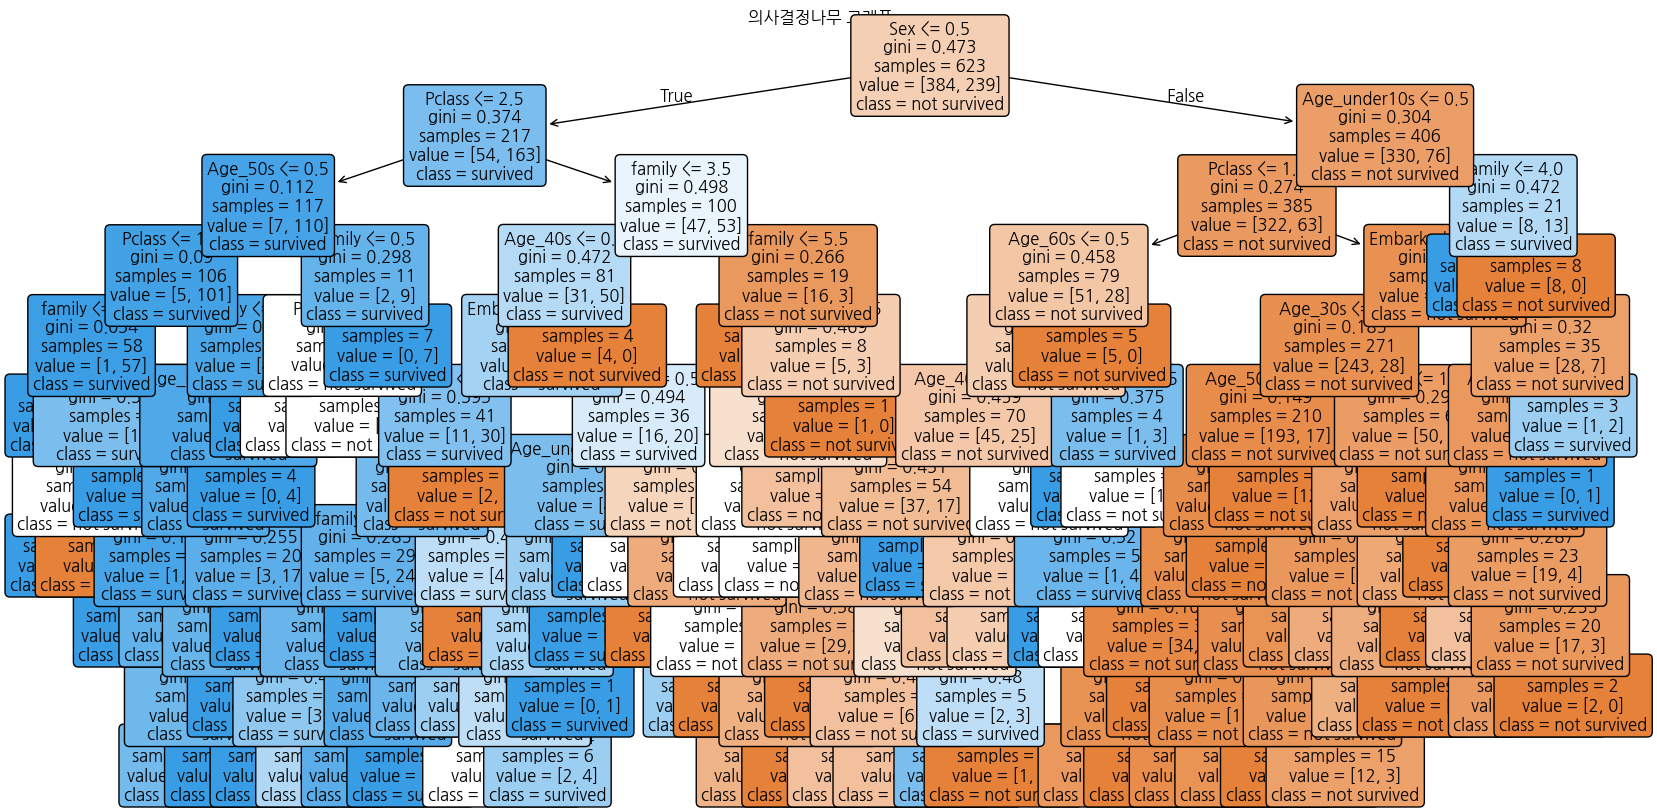

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, 
          feature_names=X_train.columns,
          class_names = ['not survived', 'survived'],
         filled=True,
         rounded=True,
          fontsize=12
         )
plt.title("의사결정나무 그래프")
plt.show()

# 💧 데이터 누수(Data Leakage)

## 📌 데이터 누수란?

> 모델이 학습 과정에서 "미래 정보" 또는 "정답과 관련된 정보"를 미리 사용해버리는 것

즉,

👉 모델이 알면 안 되는 정보를 미리 보고 학습하는 상황

---

## 🎓 시험 비유로 이해하기

- 우리는 시험을 잘 보기 위해 공부한다.
- 교과서로 공부하면 정상.
- 시험지를 미리 보고 공부하면?

👉 시험 점수는 잘 나오지만  
👉 실제 실력은 없음.

이게 바로 **데이터 누수**입니다.

---

# 🤖 머신러닝에서의 데이터 누수 예시

## ❌ 잘못된 예 1: One-Hot Encoding을 전체 데이터에 적용

```python
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# ❌ 전체 데이터에 대해 fit (누수 발생)
ohe.fit(df[['Embarked']])
```
## 🚨 문제점

- test 데이터에만 존재하는 범주까지
- 모델이 이미 알고 있음

👉 미래 정보 사용
👉 누수 발생

## 올바른 방법
```python
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

ohe = OneHotEncoder(handle_unknown='ignore')

# ✅ train에만 fit
ohe.fit(X_train[['Embarked']])

# test는 transform만
X_test_ohe = ohe.transform(X_test[['Embarked']])
```



## ❌ 잘못된 예 2: StandardScaler를 전체 데이터에 적용
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# ❌ 전체 데이터 평균/표준편차 계산 (누수 발생)
scaler.fit(df[['Age']])
```

## 🚨 문제점

- StandardScaler는 내부적으로:
평균(mean)
표준편차(std)
를 계산합니다.

- test 데이터가 평균 계산에 포함되면?

👉 미래 통계를 이미 사용
👉 누수 발생

## 올바른 방법
```python
scaler = StandardScaler()

# ✅ train에만 fit
scaler.fit(X_train[['Age']])

# test는 transform만
X_test_scaled = scaler.transform(X_test[['Age']])
```

# 데이터 누수 없이 처리해서 재분석하기

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [49]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [50]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [51]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 결측값 처리

In [52]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [53]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [54]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [55]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     891 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [56]:
data = data.drop(['PassengerId', 'Cabin'], axis=1)
data.head(2)
                  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# EDA

In [57]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='str')

In [58]:
cate_cols = data[['Survived', 'Pclass', 'Name', 'Sex','SibSp', 'Parch', 'Ticket', 'Embarked']]
num_cols = data[['Age', 'Fare']]

============================== Survived ==============================
Survived
0    549
1    342
Name: count, dtype: int64


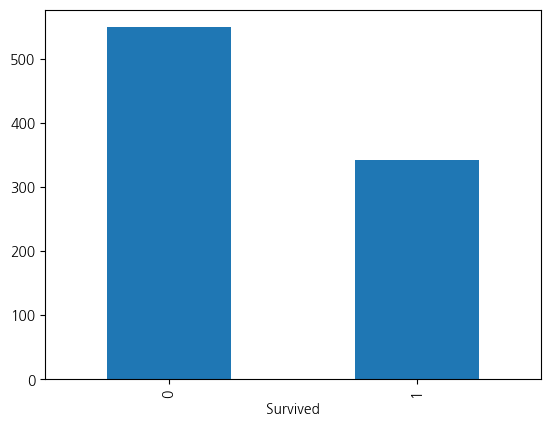


============================== Pclass ==============================
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


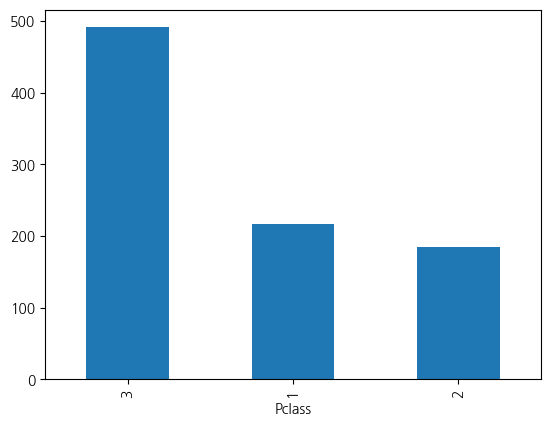


============================== Name ==============================
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64


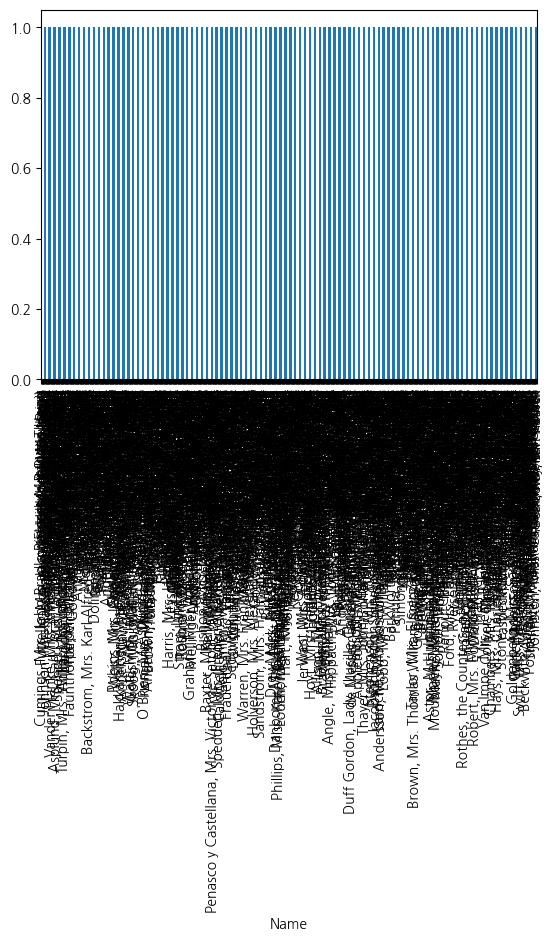


============================== Sex ==============================
Sex
male      577
female    314
Name: count, dtype: int64


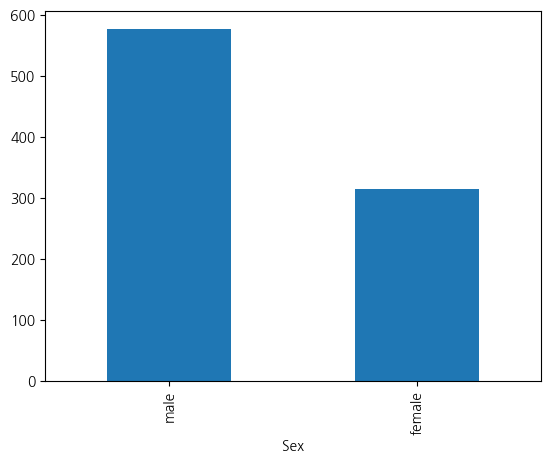


============================== SibSp ==============================
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


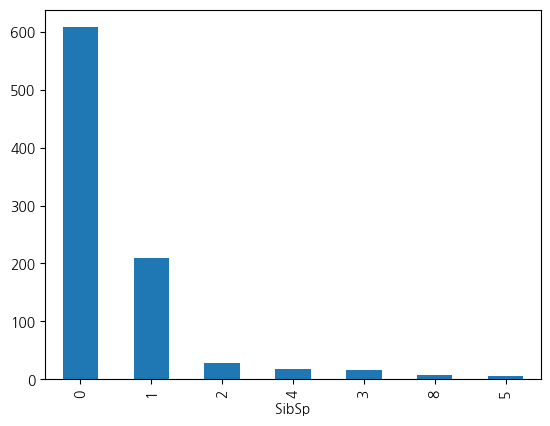


============================== Parch ==============================
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


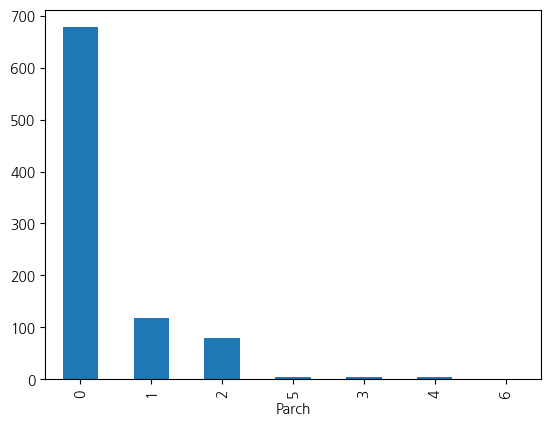


============================== Ticket ==============================
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
370376             1
Name: count, Length: 681, dtype: int64


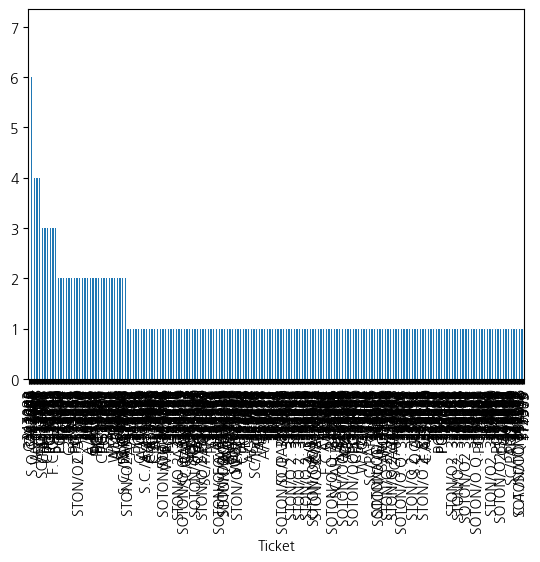


============================== Embarked ==============================
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


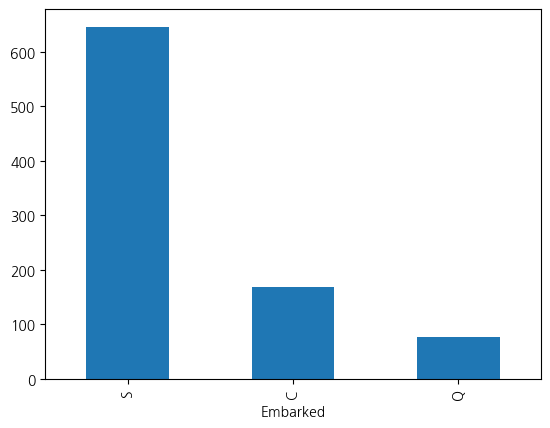

In [59]:
for col in cate_cols.columns:
    print("=" * 30, col, "=" * 30)
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()
    print()

============================== Age ==============================


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

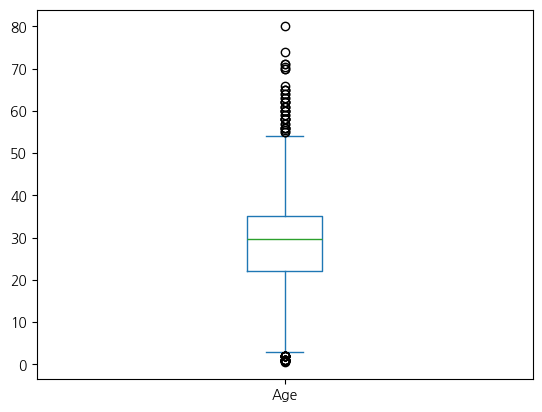

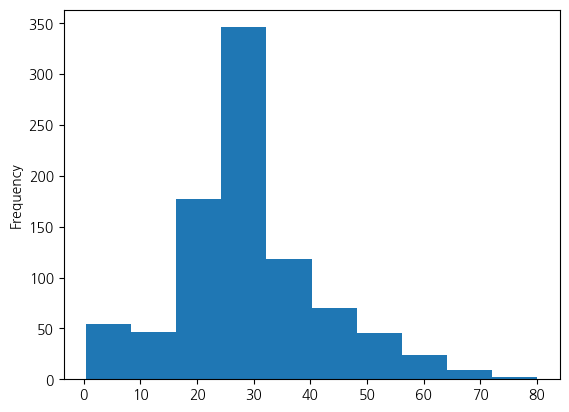

============================== Fare ==============================


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

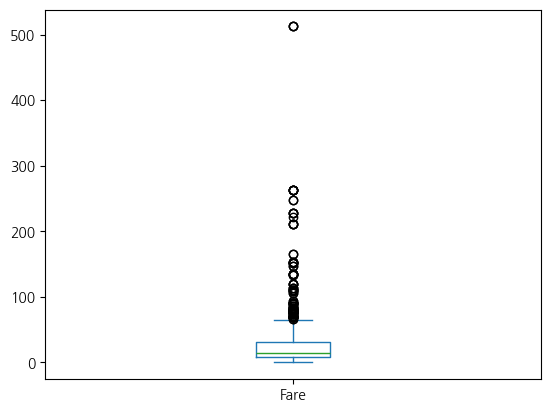

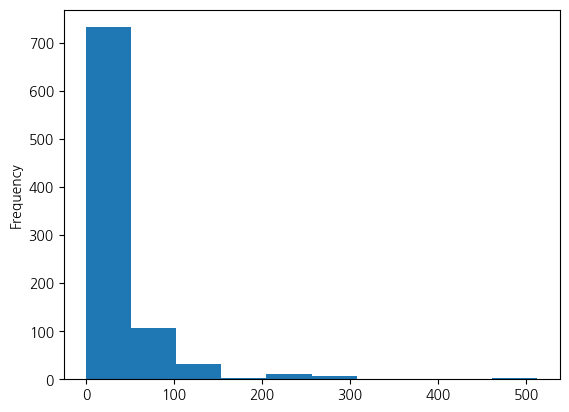

In [60]:
for col in num_cols.columns:
    print("=" * 30, col, "=" * 30)
    display(num_cols[col].describe())
    num_cols[col].plot(kind='box')
    plt.show()
    num_cols[col].plot(kind='hist')
    plt.show()

# groupby로 종속변수와 독립변수와의 관계 찾기

In [61]:
data[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [62]:
for col in data.columns[1:]:
    print("=" * 30, col, "=" * 30)
    display(data[['Survived', col]].groupby(col).mean())
    print()

============================== Pclass ==============================


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363



============================== Name ==============================


,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0



============================== Sex ==============================


,Survived
Sex,
female,0.742038
male,0.188908



============================== Age ==============================


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0



============================== SibSp ==============================


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000



============================== Parch ==============================


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000



============================== Ticket ==============================


,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000



============================== Fare ==============================


,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000



============================== Embarked ==============================


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


# sibsp + parch = family
# ticket, name 삭제

In [63]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [64]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


# 문자로 되어 있는 컬럼 숫자로 변환하기

# 🟦 문자 컬럼 숫자로 변환하기 정리

## ✅ 1) 머신러닝 모델은 숫자만 입력받을 수 있다
범주형(카테고리) 변수는 문자 형태 그대로는 모델이 처리할 수 없다.

예시:
- `Sex = ["male", "female"]`
- `Embarked = ["C", "Q", "S"]`

문자 데이터는 **순서/거리 개념이 없기 때문에**  
머신러닝 모델에 입력하기 위해서는 반드시 **숫자로 변환**해야 한다.

---

## ✅ 2) LabelEncoder는 범주 간 “순서를 만들어 버리는 문제”가 있다
LabelEncoder는 각 범주를 숫자로 변환하되 **임의의 순서를 부여한다.**

| Category | Encoded |
|----------|---------|
| C        | 0       |
| Q        | 1       |
| S        | 2       |

그러나 실제로는:
- C < Q < S  
- 또는 Q > S 같은 **순서/크기 관계가 존재하지 않는다.**

이러한 잘못된 순서 정보는  
Logistic Regression, SVM, Linear Model 같은  
**거리 기반 모델에 심각한 오류(데이터 왜곡)**를 만든다.

---

## ✅ 3) OneHotEncoder는 “순서를 없애고” 모든 범주를 독립 컬럼으로 분리한다
One-Hot Encoding은 각 범주를 **독립된 컬럼**으로 만들고  
해당 범주일 때만 1, 아니면 0을 넣는 방식이다.

예: `Embarked = ["C", "Q", "S"]`

| Embarked_C | Embarked_Q | Embarked_S |
|------------|------------|------------|
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

✅ 범주 간 **순서·거리 개념이 제거됨**  
✅ 대부분의 모델에서 **성능 향상**  
✅ 데이터 해석이 더 직관적  
✅ train/test split 후에도 안정적으로 작동 (OneHotEncoder 사용 시)

---


# 📊 범주형 인코딩 방법 비교표

| 항목 | Label Encoding | One-Hot Encoding (sklearn) | get_dummies (pandas) |
|------|----------------|----------------------------|----------------------|
| 출력 형태 | 숫자 1개 컬럼 | 범주 수만큼 컬럼 생성 | 범주 수만큼 컬럼 생성 |
| 예시 | 남자=0, 여자=1 | Sex_male, Sex_female | Sex_male, Sex_female |
| 순서 왜곡 위험 | 있음 ⚠️ | 없음 | 없음 |
| 차원 증가 | 없음 | 있음 | 있음 |
| handle_unknown 지원 | 없음 | 있음 (`handle_unknown='ignore'`) | 없음 |
| train/test 분리 안전성 | 중간 | ⭐⭐⭐ 안전 | 위험 가능 ⚠️ |
| Pipeline 사용 가능 | 가능 | 가능 | 불가능 |
| 데이터 누수 위험 | 중간 | 낮음 | 높음 (전체 데이터에 적용 시) |
| 실무 추천도 | 타겟(y)용 ⭐ | ⭐⭐⭐⭐ 추천 | 간단 EDA용 |

---

# 🎯 사용 가이드

- **타겟(y) 인코딩** → `LabelEncoder`
- **범주형 feature 전처리 (실무)** → `OneHotEncoder`
- **빠른 탐색/EDA용** → `pd.get_dummies`

---

# ⚠️ 핵심 주의사항

- `fit()`은 반드시 **train 데이터에만**
- test 데이터는 `transform()`만 수행
- `get_dummies()`는 train/test 분리 전에 전체 데이터에 적용하면 **데이터 누수 발생 가능**


In [65]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.000000,7.2500,S,1
1,1,1,female,38.000000,71.2833,C,1
2,1,3,female,26.000000,7.9250,S,0
3,1,1,female,35.000000,53.1000,S,1
4,0,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0
887,1,1,female,19.000000,30.0000,S,0
888,0,3,female,29.699118,23.4500,S,3
889,1,1,male,26.000000,30.0000,C,0


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [70]:
# 범주형, 수치형 컬럼 구분
cat_cols = ['Sex', 'Embarked']
num_cols = [col for col in X_train.columns if col not in cat_cols ]

In [71]:
cat_cols

['Sex', 'Embarked']

In [72]:
num_cols

['Pclass', 'Age', 'Fare', 'family']

In [73]:
# OneHotEncoder 설정
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [74]:
# train 데이터로 훈련 fit
ohe.fit(X_train[cat_cols])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",'first'
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_c

In [75]:
X_train

,Pclass,Sex,Age,Fare,Embarked,family
748,1,male,19.000000,53.1000,S,1
45,3,male,29.699118,8.0500,S,0
28,3,female,29.699118,7.8792,Q,0
633,1,male,29.699118,0.0000,S,0
403,3,male,28.000000,15.8500,S,1
...,...,...,...,...,...,...
476,2,male,34.000000,21.0000,S,1
190,2,female,32.000000,13.0000,S,0
736,3,female,48.000000,34.3750,S,4
462,1,male,47.000000,38.5000,S,0


In [76]:
# train, test에 각각 transform
X_train_ohe = ohe.transform(X_train[cat_cols])
X_test_ohe = ohe.transform(X_test[cat_cols])

In [77]:
# onehot 인코딩된 컬럼 이름 출력
ohe_cols = ohe.get_feature_names_out(cat_cols)
ohe_cols

array(['Sex_male', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [78]:
# dataframe으로 변환
ohe_train_df = pd.DataFrame(X_train_ohe, index=X_train.index, columns=ohe_cols)
ohe_test_df = pd.DataFrame(X_test_ohe, index=X_test.index, columns=ohe_cols)
display(ohe_train_df)
display(ohe_test_df)

,Sex_male,Embarked_Q,Embarked_S
748,1.0,0.0,1.0
45,1.0,0.0,1.0
28,0.0,1.0,0.0
633,1.0,0.0,1.0
403,1.0,0.0,1.0
...,...,...,...
476,1.0,0.0,1.0
190,0.0,0.0,1.0
736,0.0,0.0,1.0
462,1.0,0.0,1.0


,Sex_male,Embarked_Q,Embarked_S
625,1.0,0.0,1.0
566,1.0,0.0,1.0
459,1.0,1.0,0.0
804,1.0,0.0,1.0
338,1.0,0.0,1.0
...,...,...,...
184,0.0,0.0,1.0
607,1.0,0.0,1.0
624,1.0,0.0,1.0
103,1.0,0.0,1.0


In [79]:
X_train_final = pd.concat([X_train, ohe_train_df], axis=1)
X_train_final

,Pclass,Sex,Age,Fare,Embarked,family,Sex_male,Embarked_Q,Embarked_S
748,1,male,19.000000,53.1000,S,1,1.0,0.0,1.0
45,3,male,29.699118,8.0500,S,0,1.0,0.0,1.0
28,3,female,29.699118,7.8792,Q,0,0.0,1.0,0.0
633,1,male,29.699118,0.0000,S,0,1.0,0.0,1.0
403,3,male,28.000000,15.8500,S,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
476,2,male,34.000000,21.0000,S,1,1.0,0.0,1.0
190,2,female,32.000000,13.0000,S,0,0.0,0.0,1.0
736,3,female,48.000000,34.3750,S,4,0.0,0.0,1.0
462,1,male,47.000000,38.5000,S,0,1.0,0.0,1.0


In [80]:
X_test_final = pd.concat([X_test, ohe_test_df], axis=1)
X_test_final

,Pclass,Sex,Age,Fare,Embarked,family,Sex_male,Embarked_Q,Embarked_S
625,1,male,61.000000,32.3208,S,0,1.0,0.0,1.0
566,3,male,19.000000,7.8958,S,0,1.0,0.0,1.0
459,3,male,29.699118,7.7500,Q,0,1.0,1.0,0.0
804,3,male,27.000000,6.9750,S,0,1.0,0.0,1.0
338,3,male,45.000000,8.0500,S,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
184,3,female,4.000000,22.0250,S,2,0.0,0.0,1.0
607,1,male,27.000000,30.5000,S,0,1.0,0.0,1.0
624,3,male,21.000000,16.1000,S,0,1.0,0.0,1.0
103,3,male,33.000000,8.6542,S,0,1.0,0.0,1.0


In [81]:
X_train_final = X_train_final.drop(['Sex', 'Embarked'], axis=1)
X_test_final = X_test_final.drop(['Sex', 'Embarked'], axis=1)

In [82]:
X_train_final

,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
748,1,19.000000,53.1000,1,1.0,0.0,1.0
45,3,29.699118,8.0500,0,1.0,0.0,1.0
28,3,29.699118,7.8792,0,0.0,1.0,0.0
633,1,29.699118,0.0000,0,1.0,0.0,1.0
403,3,28.000000,15.8500,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...
476,2,34.000000,21.0000,1,1.0,0.0,1.0
190,2,32.000000,13.0000,0,0.0,0.0,1.0
736,3,48.000000,34.3750,4,0.0,0.0,1.0
462,1,47.000000,38.5000,0,1.0,0.0,1.0


In [83]:
X_test_final

,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
625,1,61.000000,32.3208,0,1.0,0.0,1.0
566,3,19.000000,7.8958,0,1.0,0.0,1.0
459,3,29.699118,7.7500,0,1.0,1.0,0.0
804,3,27.000000,6.9750,0,1.0,0.0,1.0
338,3,45.000000,8.0500,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
184,3,4.000000,22.0250,2,0.0,0.0,1.0
607,1,27.000000,30.5000,0,1.0,0.0,1.0
624,3,21.000000,16.1000,0,1.0,0.0,1.0
103,3,33.000000,8.6542,0,1.0,0.0,1.0


# one-hot Encoding 간단하게 하기
* ColumnTrasformer

In [84]:
X_train

,Pclass,Sex,Age,Fare,Embarked,family
748,1,male,19.000000,53.1000,S,1
45,3,male,29.699118,8.0500,S,0
28,3,female,29.699118,7.8792,Q,0
633,1,male,29.699118,0.0000,S,0
403,3,male,28.000000,15.8500,S,1
...,...,...,...,...,...,...
476,2,male,34.000000,21.0000,S,1
190,2,female,32.000000,13.0000,S,0
736,3,female,48.000000,34.3750,S,4
462,1,male,47.000000,38.5000,S,0


In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [86]:
ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
        ['Sex', 'Embarked'])
    ],
    remainder='passthrough'
)
ct.set_output(transform='pandas')

X_train_final2 = ct.fit_transform(X_train)
X_test_final2 = ct.transform(X_test)

In [87]:
X_train_final2

,ohe__Sex_male,ohe__Embarked_Q,ohe__Embarked_S,remainder__Pclass,remainder__Age,remainder__Fare,remainder__family
748,1.0,0.0,1.0,1,19.000000,53.1000,1
45,1.0,0.0,1.0,3,29.699118,8.0500,0
28,0.0,1.0,0.0,3,29.699118,7.8792,0
633,1.0,0.0,1.0,1,29.699118,0.0000,0
403,1.0,0.0,1.0,3,28.000000,15.8500,1
...,...,...,...,...,...,...,...
476,1.0,0.0,1.0,2,34.000000,21.0000,1
190,0.0,0.0,1.0,2,32.000000,13.0000,0
736,0.0,0.0,1.0,3,48.000000,34.3750,4
462,1.0,0.0,1.0,1,47.000000,38.5000,0


# 모델 선택 및 분석

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [89]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_final2, y_train)
pred = dtc.predict(X_test_final2)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7723880597014925
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       165
           1       0.72      0.67      0.69       103

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



# 🌳 DecisionTreeClassifier 하이퍼파라미터 정리

---

## 1️⃣ 분할 기준 / 분할 방식

| 파라미터 | 의미 | 주요 옵션 | 값 변화 효과 | 실무 중요도 |
|-----------|------|------------|---------------|--------------|
| `criterion` | 분할 품질 평가 기준 | `"gini"`, `"entropy"` | 분할 판단 기준이 달라짐 | ⭐⭐⭐ |
| `splitter` | 분할 탐색 방식 | `"best"`, `"random"` | random 사용 시 약간의 규제 효과 | ⭐ |

---

## 2️⃣ 트리 크기 제한 (과적합 제어 핵심)

| 파라미터 | 의미 | 기본값 | 값 ↑ 효과 | 실무 중요도 |
|-----------|------|--------|------------|--------------|
| `max_depth` | 트리 최대 깊이 | None | 깊이 제한 → 과적합 감소 | ⭐⭐⭐⭐ |
| `min_samples_split` | 분할 최소 샘플 수 | 2 | 분할 덜 발생 → 단순 모델 | ⭐⭐⭐ |
| `min_samples_leaf` | 리프 최소 샘플 수 | 1 | 작은 리프 방지 → 안정성 증가 | ⭐⭐⭐⭐ |
| `max_leaf_nodes` | 리프 개수 제한 | None | 모델 단순화 | ⭐⭐ |
| `min_impurity_decrease` | 최소 불순도 감소량 | 0 | 의미 없는 분할 방지 | ⭐⭐ |

---

## 3️⃣ Feature 선택 관련

| 파라미터 | 의미 | 옵션 | 효과 | 실무 중요도 |
|-----------|------|--------|------|--------------|
| `max_features` | 분할 시 고려할 feature 수 | None, `"sqrt"`, `"log2"`, int, float | feature 제한 → 규제 효과 | ⭐⭐⭐ |

---

## 4️⃣ 불균형 데이터 대응

| 파라미터 | 의미 | 옵션 | 효과 | 실무 중요도 |
|-----------|------|--------|------|--------------|
| `class_weight` | 클래스 가중치 | None, `"balanced"` | 소수 클래스 recall 증가 | ⭐⭐⭐ |

---

## 5️⃣ 가지치기 (Pruning)

| 파라미터 | 의미 | 기본값 | 값 ↑ 효과 | 실무 중요도 |
|-----------|------|--------|------------|--------------|
| `ccp_alpha` | 비용복잡도 가지치기 | 0 | 트리 단순화, 과적합 감소 | ⭐⭐⭐⭐ |

---

## 6️⃣ 재현성

| 파라미터 | 의미 | 효과 | 실무 중요도 |
|-----------|------|------|--------------|
| `random_state` | 랜덤 고정 | 항상 동일 결과 보장 | ⭐⭐⭐⭐⭐ |

---

# 🔥 실무 튜닝 우선순위

1. `max_depth`
2. `min_samples_leaf`
3. `min_samples_split`
4. `ccp_alpha`
5. `max_features`
6. `class_weight` (불균형일 때)

---

# 🎯 핵심 요약

- 과적합 제어 핵심 → `max_depth`, `min_samples_leaf`, `ccp_alpha`
- 불균형 대응 → `class_weight`
- 재현성 확보 → `random_state`


In [90]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train_final2, y_train)
pred = dtc.predict(X_test_final2)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7947761194029851
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       165
           1       0.88      0.54      0.67       103

    accuracy                           0.79       268
   macro avg       0.82      0.75      0.76       268
weighted avg       0.81      0.79      0.78       268



In [91]:
dtc2 = DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=42)
dtc2.fit(X_train_final2, y_train)
pred2 = dtc2.predict(X_test_final2)
print(accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



In [92]:
for i in range(1, 30):
    dtc3 = DecisionTreeClassifier(max_depth=i, class_weight="balanced", random_state=42)
    dtc3.fit(X_train_final2, y_train)
    pred3 = dtc3.predict(X_test_final2)
    print("=" * 30, i, "=" * 30)
    print(accuracy_score(y_test, pred3))
    print(classification_report(y_test, pred3))
    print()

============================== 1 ==============================
0.7761194029850746
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268


============================== 2 ==============================
0.7686567164179104
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       165
           1       0.70      0.70      0.70       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268


============================== 3 ==============================
0.8059701492537313
              precision    recall  f1-score   support

           0       0.82      0.88      0

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       165
           1       0.65      0.65      0.65       103

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268


============================== 22 ==============================
0.7313432835820896
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       165
           1       0.65      0.65      0.65       103

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268


============================== 23 ==============================
0.7313432835820896
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       165
           1       0.65      0.65      0.65       103

    accuracy

In [93]:
from sklearn.tree import plot_tree

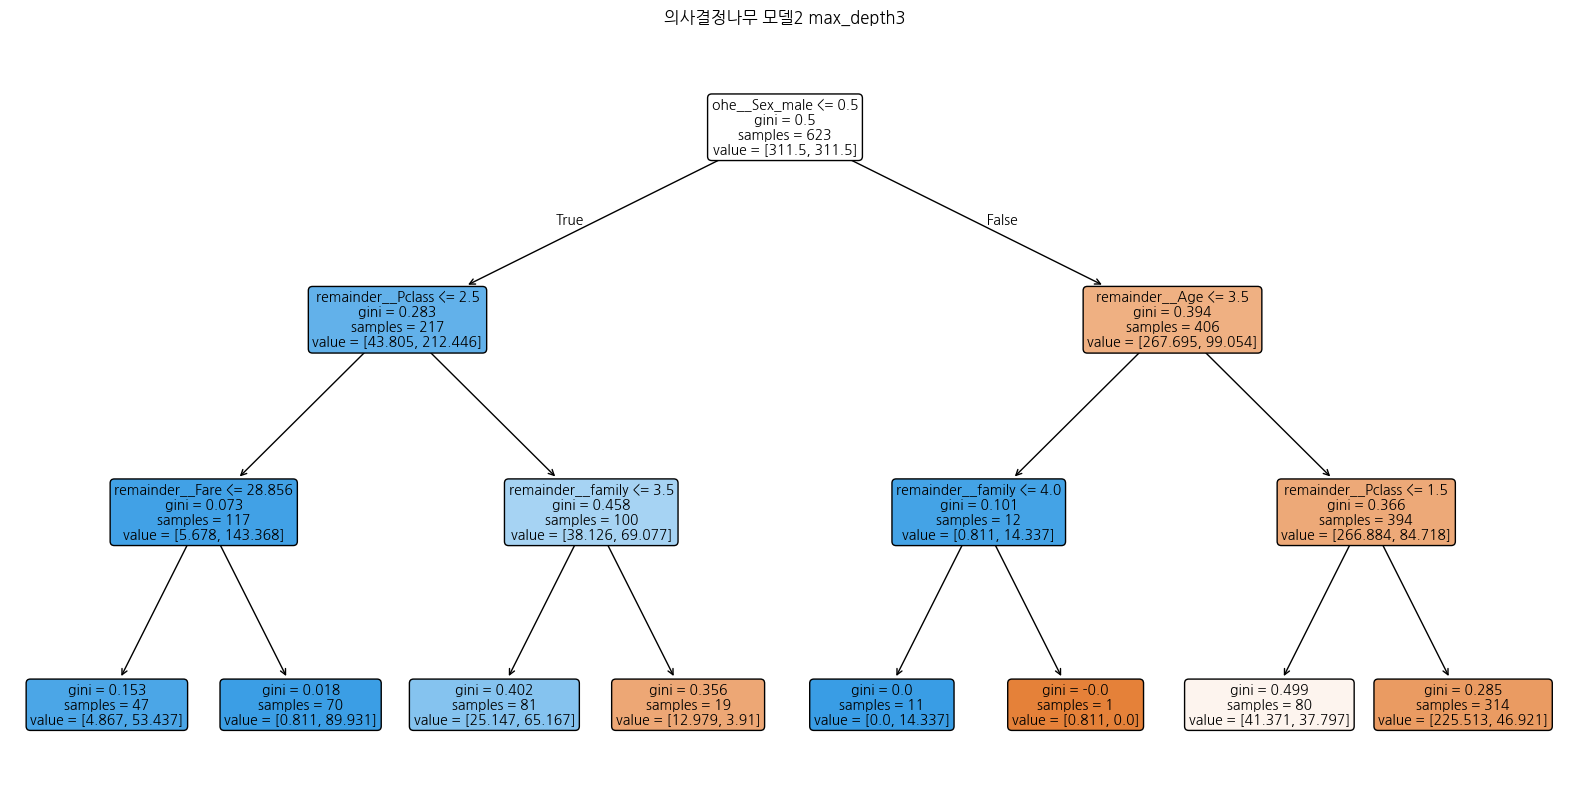

In [94]:
plt.figure(figsize=(20,10))
plot_tree(
    dtc2,
feature_names=X_test_final2.columns,
filled=True,
rounded=True,
fontsize=10)
plt.title('의사결정나무 모델2 max_depth3')
plt.show()